# Avaliação Prática: Train Futebol

 Essa é uma avaliação prática focada no uso do algoritmo Random Forest para análise de dados de futebol. Inclui etapas de pré-processamento, transformação dos dados e implementação do modelo, destacando a robustez do Random Forest contra overfitting e sua eficiência em problemas complexos. O trabalho documenta o processo e os resultados, com aplicações em Python.

**Etapa 1: Transformação, Pré-processamento dos dados e Impementação do modelo**


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Carregar os dados
football_data = pd.read_csv('/content/train_futebol (1).csv')

# Verificar e tratar valores nulos
print("Valores nulos antes do tratamento:", football_data.isnull().sum())

# Selecionar apenas colunas numéricas para imputação
numeric_cols = football_data.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')  # ou 'median' se for mais apropriado

# Aplicar a imputação apenas nas colunas numéricas
football_data[numeric_cols] = imputer.fit_transform(football_data[numeric_cols])

# Converter 'Date' e 'Time' em datetime e extrair features úteis
football_data['Datetime'] = pd.to_datetime(football_data['Date'] + ' ' + football_data['Time'], format='%d.%m.%Y %H:%M')
football_data['Month'] = football_data['Datetime'].dt.month
football_data['Hour'] = football_data['Datetime'].dt.hour
football_data.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

# Codificar variáveis categóricas usando LabelEncoder
encoder = LabelEncoder()
for col in ['Home', 'Away', 'evento', 'WIN']:
    football_data[col] = encoder.fit_transform(football_data[col])

# Normalização dos dados
scaler = StandardScaler()
features = football_data.drop('WIN', axis=1)
features_scaled = scaler.fit_transform(features)
target = football_data['WIN']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Modelo RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_test, predictions))


Valores nulos antes do tratamento: Home                   0
Away                   0
Round                  0
Date                   0
Time                   0
WIN                    0
minuto                 0
evento                 0
Yellow_Away            0
Yellow_Home            0
Goal_Away              0
Goal_Home              0
Red_Card_Away          0
Red_Card_Home          0
Own_Home               0
Own_Away               0
Penalty_Missed_Home    0
Penalty_Missed_Away    0
Var_Home               0
Var_Away               0
dtype: int64
Acurácia: 0.7996528638730473
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2431
           1       0.73      0.59      0.65      1807
           2       0.83      0.89      0.86      3828

    accuracy                           0.80      8066
   macro avg       0.78      0.77      0.77      8066
weighted avg       0.80      0.80      0.80      8066



In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir o grid de parâmetros simplificado
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Criar o modelo de busca aleatória com ajustes
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist, n_iter=5, cv=2,
                                   verbose=2, random_state=42, n_jobs=-1)

# Ajustar o modelo
try:
    random_search.fit(X_train, y_train)
    print("Melhores parâmetros:", random_search.best_params_)
    print("Melhor score:", random_search.best_score_)

    # Usar o melhor modelo
    best_model = random_search.best_estimator_
    predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Acurácia após Random Search:", accuracy)

    # Conclusão
    print("Conclusão do Projeto:")
    print("O modelo Random Forest alcançou uma acurácia de {:.2f}% no conjunto de teste.".format(accuracy * 100))
    print("Esses resultados sugerem que o modelo é robusto e eficaz para prever os resultados dos jogos da Premier League.")
except Exception as e:
    print("Ocorreu um erro durante o ajuste do modelo:", e)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Melhores parâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Melhor score: 0.7614988842053062
Acurácia após Random Search: 0.8031242251425738
Conclusão do Projeto:
O modelo Random Forest alcançou uma acurácia de 80.31% no conjunto de teste.
Esses resultados sugerem que o modelo é robusto e eficaz para prever os resultados dos jogos da Premier League.




---



**Justificativa para a escolha do Random Forest:**

O Random Forest foi escolhido por várias razões estratégicas que se alinham com os desafios e características dos dados de futebol:

- **Robustez contra Overfitting:** Diferente das árvores de decisão simples, o Random Forest minimiza o risco de overfitting ao construir múltiplas árvores de decisão e utilizar a média de suas previsões. Isso é particularmente útil em dados esportivos, que podem ter muitas variáveis interativas e ruído.

- **Capacidade de lidar com variáveis categóricas e numéricas:** O modelo é eficaz ao lidar com ambos os tipos de dados sem a necessidade de transformações extensivas, o que é ideal dado que os dados incluem tanto características numéricas (como horário do jogo) quanto categóricas (como times da casa e visitante).

- **Importância das features:** Fornece insights valiosos sobre quais variáveis mais impactam as previsões, ajudando a entender o que afeta os resultados dos jogos na Premier League.

- **Desempenho e Escalabilidade:** O modelo é conhecido por seu bom desempenho em grandes conjuntos de dados, sendo relativamente rápido e escalável devido à sua natureza paralelizável, adequado para ajustes via Randomized Search CV para otimização de hiperparâmetros.


**Teste Empírico e Estrutural do Modelo**

**Testes Realizados:**

- **Divisão de Dados:** Os dados foram divididos em 80% para treinamento e 20% para teste, o que é uma prática padrão para avaliar a performance do modelo de forma independente.

- **Treinamento e Ajuste:** O modelo foi não apenas treinado com os dados, mas também ajustado usando Randomized Search CV para encontrar a melhor configuração de hiperparâmetros, assegurando que o modelo esteja bem ajustado para capturar padrões sem se ajustar demais a peculiaridades do conjunto de treinamento.


Acurácia após Random Search: 0.8031242251425738


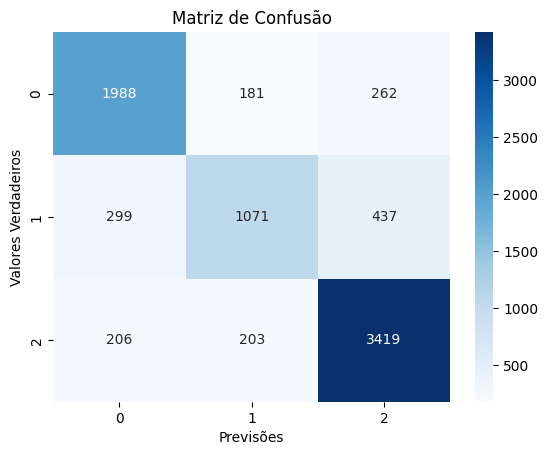

In [45]:
# Validação do Modelo - Métricas e Visualizações
# Acurácia do modelo
print("Acurácia após Random Search:", accuracy)

# Matriz de Confusão
# A matriz de confusão mostra o número de previsões corretas e incorretas divididas por cada classe

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.show()
# A matriz de confusão mostra o número de previsões corretas e incorretas feitas pelo modelo, subdivididas por cada classe.
# Ela ajuda a entender quais classes o modelo está confundindo mais e onde está cometendo mais erros.


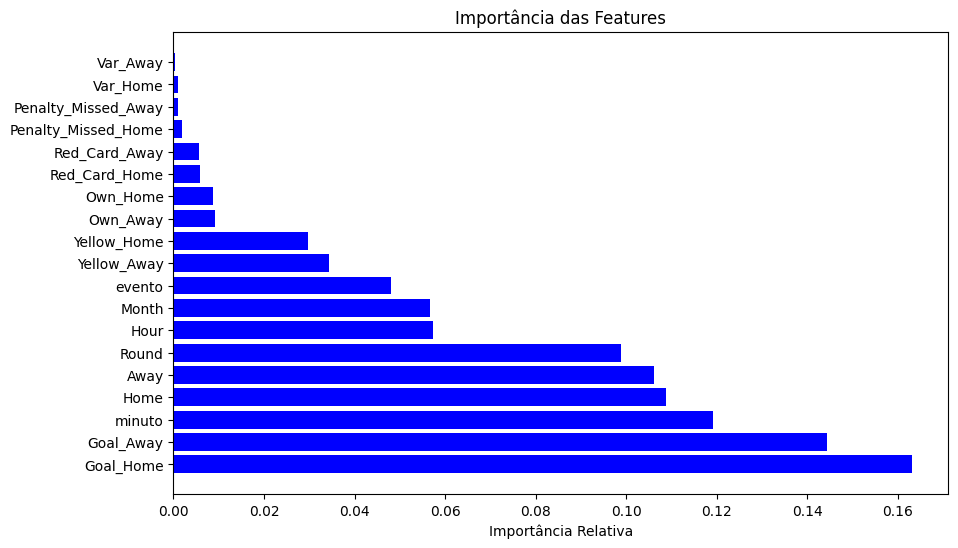

In [46]:
# Importância das Features
# O gráfico de barras mostra a importância relativa de cada feature no modelo Random Forest

import numpy as np
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features_names = [features.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Importância das Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features_names)
plt.xlabel('Importância Relativa')
plt.show()
# O gráfico de barras mostra a importância relativa de cada feature no modelo Random Forest.
# A importância é medida com base na redução da impureza das folhas (Gini impurity) em todas as árvores.
# Features com maior importância são mais relevantes para o modelo.


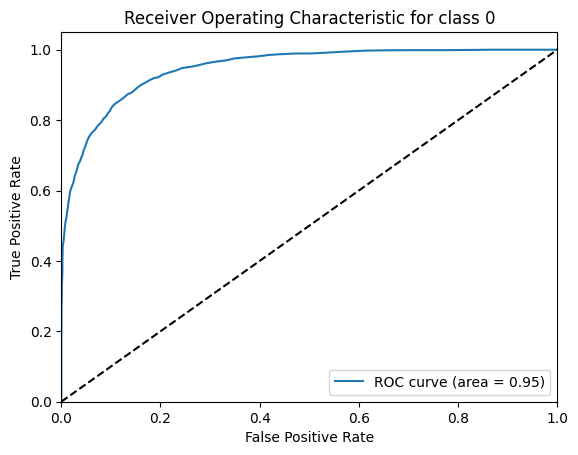

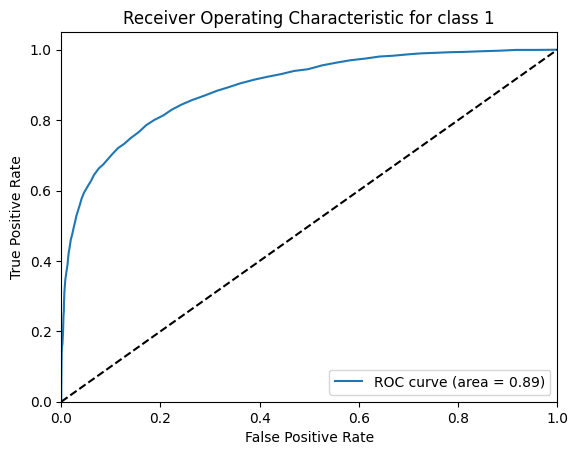

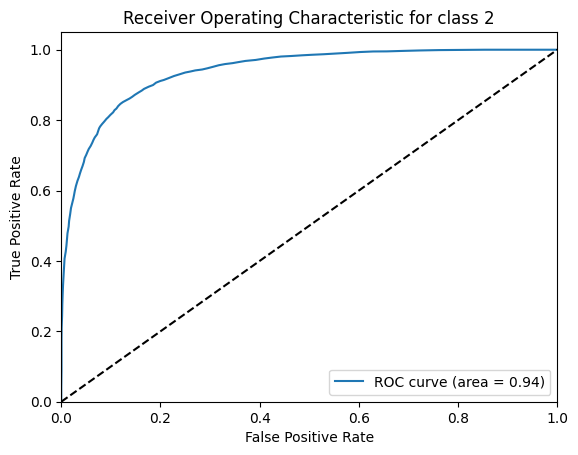

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarizar as labels do conjunto de treino para que o tamanho seja consistente com X_train
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

# Ajustar o modelo OneVsRest com o conjunto de treino binarizado
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
classifier.fit(X_train, y_train_bin)

# Obter as pontuações preditas para o conjunto de teste
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = classifier.predict_proba(X_test)

# Calcular a curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotar a curva ROC
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()


# **Prever valores da base de teste e Submeter a competição**

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Função para pré-processamento dos dados
def preprocess_data(df, encoders=None, is_train=True):
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df.drop(columns=['Date'], inplace=True)  # Remover a coluna original

    # Codificar variáveis categóricas usando LabelEncoder
    if is_train:
        encoders = {}
        for column in ['Home', 'Away', 'evento']:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            encoders[column] = le
    else:
        # Usar encoders treinados
        for column in ['Home', 'Away', 'evento']:
            if column in df.columns:
                # Atribuir um valor padrão (-1) para valores desconhecidos
                df[column] = df[column].apply(lambda x: -1 if x not in encoders[column].classes_ else encoders[column].transform([x])[0])

    # Preencher valores nulos
    df.fillna(0, inplace=True)

    return df, encoders

# Carregar os dados de treinamento e teste
df_train = pd.read_csv('/content/train_futebol (1).csv')
df_test = pd.read_csv('/content/test_futebol.csv')

# Pré-processamento dos dados de treinamento
df_train, label_encoders = preprocess_data(df_train, is_train=True)

# Separar features e target
X_train = df_train.drop(columns=['WIN'])
y_train = df_train['WIN']

# Normalização dos dados de treinamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))

# Treinamento do modelo com validação cruzada
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean():.4f} +/- {scores.std() * 2:.4f}")

model.fit(X_train_scaled, y_train)

# Pré-processar os dados de teste
df_test, _ = preprocess_data(df_test, encoders=label_encoders, is_train=False)

# Normalização dos dados de teste
X_test_scaled = scaler.transform(df_test.select_dtypes(include=['number']))

# Fazer previsões
test_predictions = model.predict(X_test_scaled)

# Salvar as previsões em um DataFrame
submission_df = pd.DataFrame({
    'ID': df_test.get('ID', range(len(df_test))),  # Usar a coluna ID do conjunto de teste, se existir
    'WIN': test_predictions  # As previsões feitas pelo modelo
})

# Visualizar as primeiras linhas do arquivo de submissão
print(submission_df.head(40))

# Salvar o DataFrame em um arquivo CSV
submission_df.to_csv('submission.csv', index=False)  # O parâmetro index=False evita que o índice seja salvo no arquivo

Acurácia média com validação cruzada: 0.6912 +/- 0.0298
    ID   WIN
0    0  Home
1    1  Home
2    2  Home
3    3  Home
4    4  Home
5    5  Home
6    6  Home
7    7  Home
8    8  Home
9    9  Home
10  10  Home
11  11  Away
12  12  Away
13  13  Draw
14  14  Away
15  15  Away
16  16  Away
17  17  Away
18  18  Away
19  19  Draw
20  20  Home
21  21  Home
22  22  Home
23  23  Home
24  24  Home
25  25  Away
26  26  Away
27  27  Away
28  28  Home
29  29  Home
30  30  Draw
31  31  Draw
32  32  Away
33  33  Draw
34  34  Away
35  35  Away
36  36  Away
37  37  Away
38  38  Draw
39  39  Draw
